In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

C:\Users\blacat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\blacat\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [147]:
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (10, 7)

In [3]:
digits = datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
X = pd.DataFrame(digits['data'])
X.shape

(1797, 64)

In [6]:
Y = pd.Series(digits['target'])
Y.shape

(1797,)

In [7]:
Y.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [8]:
Ydm = pd.get_dummies(Y)

In [9]:
Ydm.shape

(1797, 10)

In [10]:
Ydm.head(2)

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0


In [11]:
# Разбиваем на тестовую и общучающие выборки, с которыми будем работать дальше

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Ydm, test_size = 0.3, random_state = 0 )

In [13]:
X_train.reset_index(inplace = True)
Y_train.reset_index(inplace = True)

In [100]:
X_test.reset_index(inplace = True)
Y_test.reset_index(inplace = True)

In [14]:
del X_train['index']

In [15]:
del Y_train['index']

In [101]:
del X_test['index']
del Y_test['index']

In [104]:
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,8.0,10.0,14.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,12.0,2.0,0.0,0.0,0.0
1,0.0,0.0,7.0,16.0,12.0,1.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,7.0,16.0,16.0,16.0,4.0,0.0
2,0.0,0.0,0.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,10.0,14.0,12.0,8.0,0.0


In [17]:
Y_train.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0


# KNN кластеризация

Проведем подброр наилучших парметров модели методом GridSearch. 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model_knn = KNeighborsClassifier()

In [20]:
# формируем набор параметров для girdsearch
param_knn =  { 'n_neighbors': np.array(range(1,15)) ,
               'leaf_size': np.array(range(1,50)) ,
               'weights': ['uniform', 'distance'] ,
               'algorithm': ['ball_tree', 'kd_tree', 'brute'] ,
               #'cv': np.array(range(1,12)) ,
               'p': [1, 2] } 

In [21]:
# при каком делении на фолды лучше отрабатывает
#for i in range(2, 13):
#    cv = cross_val_score(model_knn, X_train, Y_train, cv=i, n_jobs=-1)
#    print('folds: {:2d}, mean: {:.4f}, std: {:.4f}'. format(i, cv.mean(), cv.std() ) )

In [22]:
%%time
grid_knn = GridSearchCV(model_knn, param_grid = param_knn, scoring = 'accuracy', n_jobs = -1)
grid_knn.fit(X_train, Y_train)
print ('best_params: {}'.format(grid_knn.best_params_) )
#   print ('folds: {:2d}, grid_best_score: {:.5f}'. format(i,  grid_knn.best_score_))

best_params: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Wall time: 6min 24s


In [23]:
grid_knn.best_score_

0.9824980111376292

In [24]:
model_knn_param = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', algorithm = 'ball_tree', leaf_size = 1,\
                                       p = 2, n_jobs = -1)

In [25]:
%%time
# при текущих лучших параметрах подберем лучшее разбиение на число фолдов для обучения
for i in range(2, 15):
    cv = cross_val_score(model_knn_param, X_train, Y_train, cv = i, n_jobs = -1)
    print('folds: {:2d}, mean: {:.4f}, std: {:.4f}'. format(i, cv.mean(), cv.std() ) )

folds:  2, mean: 0.9825, std: 0.0048
folds:  3, mean: 0.9825, std: 0.0041
folds:  4, mean: 0.9849, std: 0.0069
folds:  5, mean: 0.9849, std: 0.0077
folds:  6, mean: 0.9873, std: 0.0109
folds:  7, mean: 0.9865, std: 0.0107
folds:  8, mean: 0.9881, std: 0.0103
folds:  9, mean: 0.9857, std: 0.0101
folds: 10, mean: 0.9865, std: 0.0138
folds: 11, mean: 0.9873, std: 0.0131
folds: 12, mean: 0.9873, std: 0.0131
folds: 13, mean: 0.9873, std: 0.0109
folds: 14, mean: 0.9881, std: 0.0136
Wall time: 54.7 s


Выбираем 8 фолдов для дальнейшей работы. Кросс-валидация на 8 фолдах при наилучших полученных параметрах.

In [26]:
kf = KFold(n_splits=8, random_state=111111, shuffle=True)
kf

KFold(n_splits=8, random_state=111111, shuffle=True)

In [27]:
%%time
mse = []
acc = []
for train_ind, test_ind in kf.split(X_train, Y_train):

    # обучающая часть
    x_kf_train = X_train.loc[train_ind] 
    y_kf_train = Y_train.loc[train_ind]
    
    # предсказание
    x_kf_test = X_train.loc[test_ind]
    y_kf_test = Y_train.loc[test_ind]

    # обучаем и предсказываем
    model_knn_param.fit(x_kf_train, y_kf_train)
    y_kf_pred=model_knn_param.predict(x_kf_test)
    
    # считаем ошибку
    mse.append(mean_squared_error(y_kf_test, y_kf_pred))
    acc.append(accuracy_score(y_kf_test, y_kf_pred))
print('mse: {}'.format( mse))
print('mse.mean: {:.6f} '. format( np.array(mse).mean()) )
''
print('accuracy: {}'.format( acc))
print('accuracy.mean: {:.6f} '. format( np.array(acc).mean()) )

mse: [0.0025316455696202532, 0.0012738853503184715, 0.0012738853503184715, 0.002547770700636943, 0.003821656050955414, 0.002547770700636943, 0.0038216560509554145, 0.0038216560509554145]
mse.mean: 0.002705 
accuracy: [0.98734177215189878, 0.99363057324840764, 0.99363057324840764, 0.98726114649681529, 0.98089171974522293, 0.98726114649681529, 0.98089171974522293, 0.98089171974522293]
accuracy.mean: 0.986475 
Wall time: 1.08 s


Предсказание с помощью обученной модели

In [28]:
model_knn_param.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
knn_proba = model_knn_param.predict_proba(X_test)

In [30]:
dict_knn_proba ={}
dict_knn_proba.clear()
for i in range(0,10):
    dict_knn_proba[i]=knn_proba[i][:,1]

In [31]:
knn_proba_df = pd.DataFrame(data=dict_knn_proba)
knn_proba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
0    540 non-null float64
1    540 non-null float64
2    540 non-null float64
3    540 non-null float64
4    540 non-null float64
5    540 non-null float64
6    540 non-null float64
7    540 non-null float64
8    540 non-null float64
9    540 non-null float64
dtypes: float64(10)
memory usage: 42.3 KB


In [32]:
knn_predict = model_knn_param.predict(X_test)
knn_predict.shape

(540, 10)

In [105]:
average_precision_score( Y_test, knn_proba_df ) # среднее по всем классам

0.98035178918483479

In [106]:
average_precision_score( Y_test, knn_proba_df, average = None) # для каждого класса в отдельности

array([ 1.        ,  1.        ,  1.        ,  0.94736842,  1.        ,
        0.95138541,  0.98360656,  1.        ,  0.98545841,  0.9356991 ])

In [170]:
fpr_knn = dict()
tpr_knn = dict()
thr_knn = dict()
roc_auc_knn = dict()

fpr_knn.clear()
tpr_knn.clear()
thr_knn.clear()
roc_auc_knn.clear()

In [171]:
for i in range(0, 10):
    fpr_knn[i] , tpr_knn[i] , thr_knn[i] = roc_curve( Y_test[i], knn_proba_df[i] )
    roc_auc_knn[i] = auc( fpr_knn[i], tpr_knn[i] )

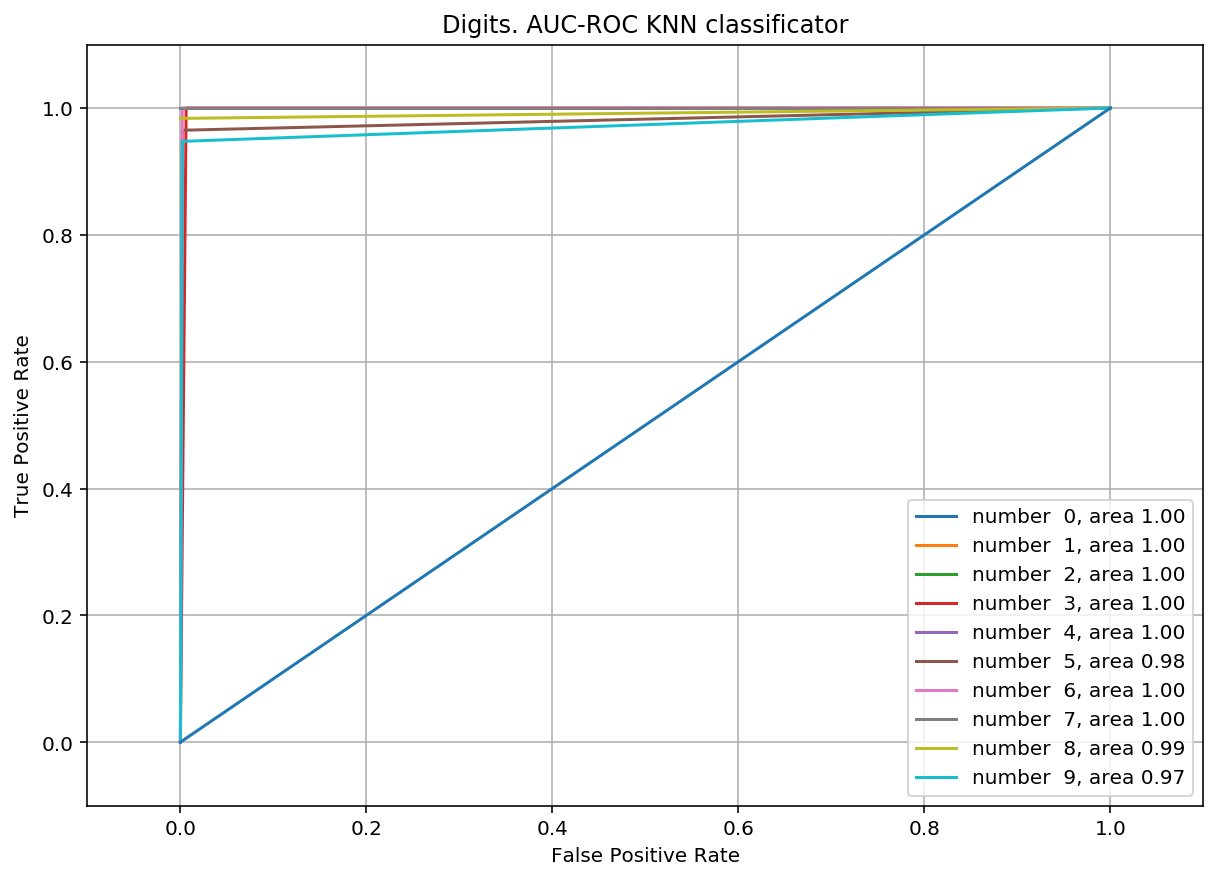

In [261]:
for i in range(0, 10):
    plt.plot( fpr_knn[i], tpr_knn[i], label='number {:2d}, area {:.2f}'.format(i, roc_auc_knn[i]))       
    
plt.plot([0, 1], [0, 1])
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Digits. AUC-ROC KNN classificator')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Для получения качественного результата, который можно оценить не только по графику, посчитаем такой 
искусственный параметр, как сумму площадей под кривой AUC-ROC для всех десяти классов.
При наилучшем исходе приближения такая сумма будет стремиться к 10, тк наилучший результат, 
когда площадь под кривой для каждого из классов равна единице у 10 классов. 

Сравним результат этой суммы после отработки всех трех алгоритмов. 

Суммарная площадь под кривыми AUC-ROC для модели KNeighborsClassifier

In [275]:
ra_knn_sum = 0.0
for i in range(0,10):
    ra_knn_sum += roc_auc_knn[i]

In [276]:
ra_knn_sum # для KNeighborsClassifier

9.9417451497712221

# DecisionTree. Дерево

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_tree = DecisionTreeClassifier()

In [43]:
# формируем набор параметров для girdsearch
param_tree =  { 'criterion' : ['gini','entropy'],
                'splitter' : ['best','random'],
                'max_depth' : np.array(range(1,20)),
                'min_samples_split': np.array(range(2,11)), 
                'min_samples_leaf' : np.array(range(2,11)),
                'max_features' : np.array(range(1,64)), 
                'presort' : [True, False], 
                'random_state' : [None, 222222]
              }

In [44]:
%%time
grid_tree = GridSearchCV(model_tree, param_grid = param_tree, scoring = 'accuracy', n_jobs = -1)
grid_tree.fit(X_train, Y_train)
print ('best_params: {}'.format(grid_tree.best_params_) )

best_params: {'criterion': 'entropy', 'max_depth': 18, 'max_features': 33, 'min_samples_leaf': 2, 'min_samples_split': 3, 'presort': False, 'random_state': None, 'splitter': 'best'}
Wall time: 4h 54min 29s


In [175]:
grid_tree.best_score_

0.8408910103420844

In [202]:
model_tree_param = DecisionTreeClassifier( criterion= 'entropy', max_depth= 18, max_features= 33 , 
                                         min_samples_leaf = 2, min_samples_split = 3, presort = False, 
                                         splitter = 'best', random_state = None)

In [226]:
%%time
# при текущих лучших параметрах подберем лучшее разбиение на число фолдов для обучения
for i in range(2, 15):
    cv_tree = cross_val_score(model_tree_param, X_train, Y_train, cv=i, n_jobs=-1)
    print('folds: {:2d}, mean: {:.6f}, std: {:.6f}'. format(i, cv_tree.mean(), cv_tree.std() ) )

folds:  2, mean: 0.760545, std: 0.005378
folds:  3, mean: 0.789976, std: 0.015467
folds:  4, mean: 0.778852, std: 0.012581
folds:  5, mean: 0.809834, std: 0.018352
folds:  6, mean: 0.813822, std: 0.024958
folds:  7, mean: 0.801091, std: 0.021210
folds:  8, mean: 0.826564, std: 0.016538
folds:  9, mean: 0.815462, std: 0.014656
folds: 10, mean: 0.823327, std: 0.041058
folds: 11, mean: 0.832182, std: 0.027136
folds: 12, mean: 0.822581, std: 0.022288
folds: 13, mean: 0.814615, std: 0.034354
folds: 14, mean: 0.806599, std: 0.043852
Wall time: 1min 3s


In [217]:
# разбиваем на 11 фолдов

In [227]:
kf_tree = KFold(n_splits=11, random_state=None, shuffle=True)
kf_tree

KFold(n_splits=11, random_state=None, shuffle=True)

In [228]:
%%time
mse_tr = []
acc_tr = []
for train_ind, test_ind in kf_tree.split(X_train, Y_train):

    # обучающая часть
    x_kf_train_tr = X_train.loc[train_ind] 
    y_kf_train_tr = Y_train.loc[train_ind]
    
    # предсказание
    x_kf_test_tr = X_train.loc[test_ind]
    y_kf_test_tr = Y_train.loc[test_ind]

    # обучаем и предсказываем
    model_tree_param.fit(x_kf_train_tr, y_kf_train_tr)
    y_kf_pred_tr=model_tree_param.predict(x_kf_test_tr)
    
    # считаем ошибку
    mse_tr.append(mean_squared_error(y_kf_test_tr, y_kf_pred_tr))
    acc_tr.append(accuracy_score(y_kf_test_tr, y_kf_pred_tr))
print('mse: {}'.format( mse_tr))
print('mse.mean: {:.6f} '. format( np.array( mse_tr ).mean()) )
print('accuracy: {}'.format( acc_tr ))
print('accuracy.mean: {:.6f} '. format( np.array( acc_tr ).mean()) )

mse: [0.026956521739130435, 0.033913043478260872, 0.039130434782608692, 0.031578947368421054, 0.028070175438596488, 0.032456140350877197, 0.023684210526315787, 0.028070175438596488, 0.028070175438596488, 0.030701754385964914, 0.039473684210526314]
mse.mean: 0.031100 
accuracy: [0.83478260869565213, 0.78260869565217395, 0.78260869565217395, 0.83333333333333337, 0.84210526315789469, 0.82456140350877194, 0.85964912280701755, 0.83333333333333337, 0.82456140350877194, 0.79824561403508776, 0.76315789473684215]
accuracy.mean: 0.816268 
Wall time: 266 ms


In [229]:
model_tree_param.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=18,
            max_features=33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [230]:
tree_proba = model_tree_param.predict_proba(X_test)

In [231]:
dict_tree_proba ={}
dict_tree_proba.clear()
for i in range(0,10):
    dict_tree_proba[i]=tree_proba[i][:,1]

In [232]:
tree_proba_df = pd.DataFrame(data=dict_tree_proba)
tree_proba_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [233]:
average_precision_score( Y_test, tree_proba_df )

0.75164184673650403

In [234]:
average_precision_score( Y_test, tree_proba_df, average = None )

array([ 0.95390275,  0.65715768,  0.6574692 ,  0.74289427,  0.81810831,
        0.7922947 ,  0.89221584,  0.76788585,  0.57028163,  0.66420824])

In [235]:
fpr_tree = dict()
tpr_tree = dict()
thr_tree = dict()
roc_auc_tree = dict()

fpr_tree.clear()
tpr_tree.clear()
thr_tree.clear()
roc_auc_tree.clear()

In [236]:
for i in range(0, 10):
    fpr_tree[i] , tpr_tree[i] , thr_tree[i] = roc_curve( Y_test[i], tree_proba_df[i] )
    roc_auc_tree[i] = auc( fpr_tree[i], tpr_tree[i] )

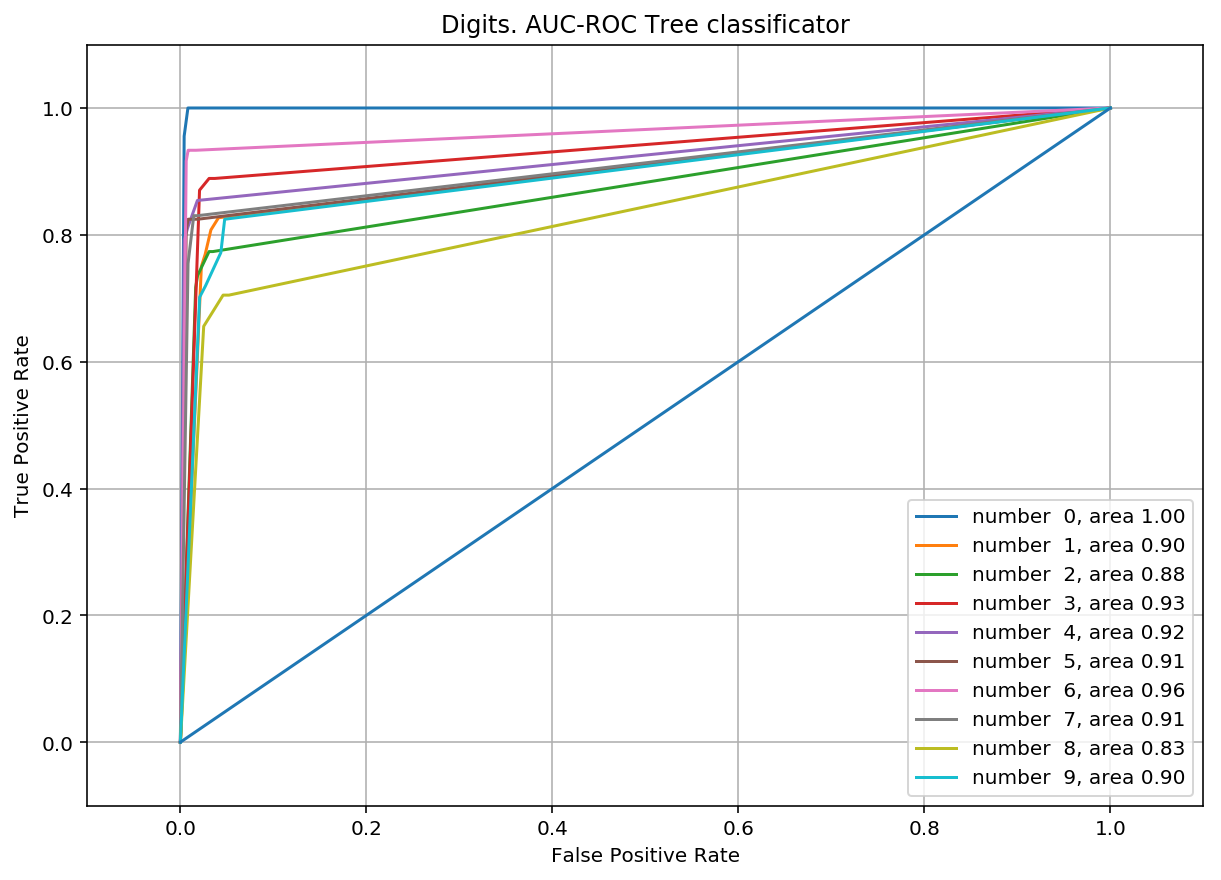

In [241]:
for i in range(0, 10):
    plt.plot( fpr_tree[i], tpr_tree[i], label='number {:2d}, area {:.2f}'.format(i, roc_auc_tree[i]) )       
    
plt.plot([0, 1], [0, 1])
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Digits. AUC-ROC Tree classificator')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Суммарная площадь под всеми кривыми AUC-ROC для DecisionTreeClassifier

In [268]:
ra_tree_sum = 0.0
for i in range(0,10):
    ra_tree_sum += roc_auc_tree[i]

In [274]:
ra_tree_sum  # для 

9.1407308353424064